# 0: Section Overview

In this section, we will impliment a baseline model. This will provide a basic model against which more complex models can be compared. This comparison will help us to gauge the effectiveness of enhancements or modifications made to the model. Additionally, It sets a standard for evaluating whether more sophisticated models actually provide improvements in predictive performance (in our case, this performance metric is measured as the MSE).

# 1: Necessary Imports

In [314]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy.stats as stats

# 2: Data Access

We will access the data in the same way we accessed the date in section 03-EDA

In [11]:
test_filepath = r"C:\Users\markm\OneDrive\Documents\University\Year 4\dst\GitHub\Assessment_1\Train_and_Test_data\test.xlsx" # Enter your file path for the train data
train_filepath = r"C:\Users\markm\OneDrive\Documents\University\Year 4\dst\GitHub\Assessment_1\Train_and_Test_data\train.xlsx" # Enter your file path for the test data

test_data = pd.read_excel(test_filepath)
train_data = pd.read_excel(train_filepath)

            date iso_code continent      location  Stringency Index  CH Index  \
0     2020-01-05      AND    Europe       Andorra               0.0       0.0   
1     2020-01-06      AND    Europe       Andorra               0.0       0.0   
2     2020-01-07      AND    Europe       Andorra               0.0       0.0   
3     2020-01-08      AND    Europe       Andorra               0.0       0.0   
4     2020-01-09      AND    Europe       Andorra               0.0       0.0   
...          ...      ...       ...           ...               ...       ...   
52257 2024-07-31      ZAF    Africa  South Africa               NaN       NaN   
52258 2024-08-01      ZAF    Africa  South Africa               NaN       NaN   
52259 2024-08-02      ZAF    Africa  South Africa               NaN       NaN   
52260 2024-08-03      ZAF    Africa  South Africa               NaN       NaN   
52261 2024-08-04      ZAF    Africa  South Africa               NaN       NaN   

       Gov Resp Index  Econ

In [ ]:
print(test_data.head())

# 3: Implimenting the baseline model: Linear Regression

Initally, let us train the model on the entire training data. Note that we don't require the first 4 columns (date, iso_code, continent and location). Therefore, the first thing we will do is remove these columns.

In [116]:
train_data_string_cols_rem = train_data.iloc[:, 4:]
test_data_string_cols_rem = test_data.iloc[:, 4:]

print(train_data_string_cols_rem.columns)

Index(['Stringency Index', 'CH Index', 'Gov Resp Index', 'Econ Sup Index',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinatio

### Training Data

We will select the relevant columns for our particular model, these being the dependent variable, 'reproduction_rate', and all the covariates, these being 'Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index' and 'days_since'. We also choose to remove any rows with missing values. Later on in the project we will evaluate how we can go about using those rows with missing information.

In [343]:
# base: 0.1233 MSE 0.15 R^2
# + positive_rate = 0.0775 MSE 0.07 R^2

covariates = ['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since','total_cases_per_million']
covariates_and_repr = covariates + ['total_vaccinations_per_hundred']

train_data_filtered = train_data_string_cols_rem[covariates_and_repr].dropna()

X_train = train_data_filtered[covariates]
y_train = train_data_filtered['total_vaccinations_per_hundred']

print()
print(X_train.shape)
print(len(y_train))


(41737, 6)
41737


### Testing Data

We impliment the same filtering as we did with the training data.

In [342]:
test_data_filtered = test_data_string_cols_rem[covariates_and_repr].dropna()

X_test = test_data_filtered[covariates]
y_test = test_data_filtered[['total_vaccinations_per_hundred']]


print()
print(X_test.shape)
print(len(y_test))


(9119, 6)
9119


In [347]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

print(X_test)

# def sigmoid(x):
#     return 100 / (1 + np.exp(-x))  # Scaling sigmoid to range 0-100

# Make predictions on the test data
y_pred = linear_model.predict(X_test)
# y_pred_sigmoid = sigmoid(y_pred)
print("y_pred shape:", y_pred.shape)
# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
R_squared = linear_model.score(X_test, y_test)

# Print the MSE result
print(f'Mean Squared Error on the test data: {mse:.4f}')
print(f'Mean Absolute Error on the test data: {mae:.4f}')
print(f'R^2: {R_squared:.4f}')



       Stringency Index  CH Index  Gov Resp Index  Econ Sup Index  days_since  \
386               52.78     61.19           66.04           100.0         386   
393               55.56     58.81           63.96           100.0         393   
402               55.56     61.55           66.35           100.0         402   
404               55.56     61.55           66.35           100.0         404   
411               55.56     61.55           66.35           100.0         411   
...                 ...       ...             ...             ...         ...   
51670             11.11     21.43           21.88            25.0        1082   
51671             11.11     21.43           21.88            25.0        1083   
51672             11.11     21.43           21.88            25.0        1084   
51673             11.11     21.43           21.88            25.0        1085   
51674             11.11     21.43           21.88            25.0        1086   

       total_cases_per_mill

In [340]:
print(y_pred)

[ 37.73703691  25.55461142  38.38979973 ... 178.01456357 178.30322428
 178.58512057]


#### Addressing a TypeError

In [351]:
print(type(y_test))  # Should be pandas.Series or numpy.ndarray
print(type(y_pred))  # Should be pandas.Series or numpy.ndarray

y_test = y_test.squeeze()  # Convert DataFrame to Series
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


[ 37.73703691  25.55461142  38.38979973 ... 178.01456357 178.30322428
 178.58512057]
386      52.78
393      55.56
402      55.56
404      55.56
411      55.56
         ...  
51670    11.11
51671    11.11
51672    11.11
51673    11.11
51674    11.11
Name: Stringency Index, Length: 9119, dtype: float64



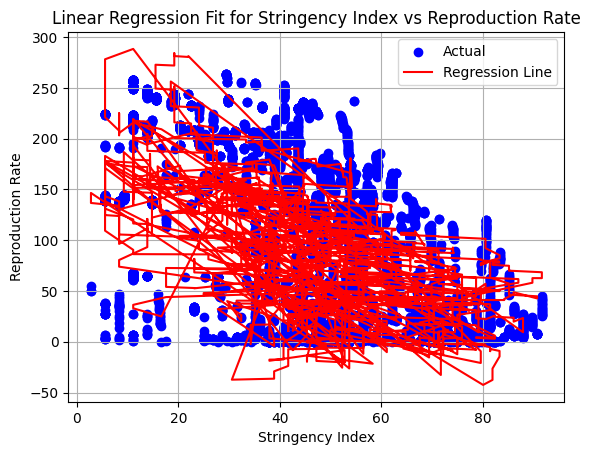

In [348]:
# Select the feature of interest, e.g., 'CH Index'
feature_name = 'Stringency Index'

# Plot actual vs predicted for the feature
plt.scatter(X_test[feature_name], y_test, color='blue', label='Actual')

# Plot the linear regression line

print(y_pred)
print(X_test[feature_name])
print()

plt.plot(X_test[feature_name], y_pred, color='red', label='Regression Line')

plt.title(f'Linear Regression Fit for {feature_name} vs Reproduction Rate')
plt.xlabel(feature_name)
plt.ylabel('Reproduction Rate')
plt.legend()
plt.grid(True)
plt.show()



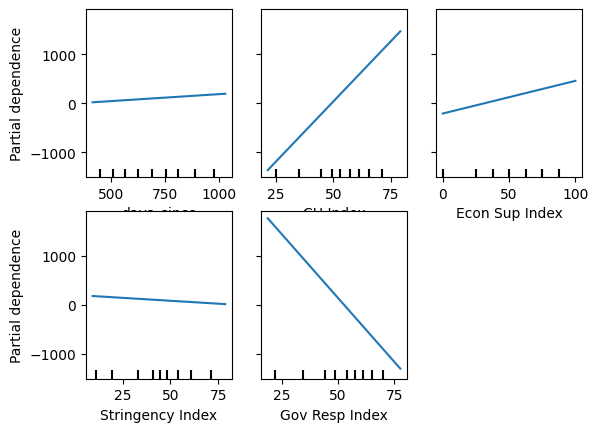

In [349]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming 'model' is your trained linear regression model
features = ['days_since', 'CH Index', 'Econ Sup Index', 'Stringency Index', 'Gov Resp Index']  # Replace with your feature names

# Create partial dependence plots
PartialDependenceDisplay.from_estimator(linear_model, X_test, features, grid_resolution=50)

plt.show()


# 4: Cross-validation

Since we have no hyperparameters to tune in the Baseline Linear model, Cross-validation will not be required. Hence we will not impliment it here.

# 5: Visualising our performance metric for the baseline model

## 5.1: Scatter Plot

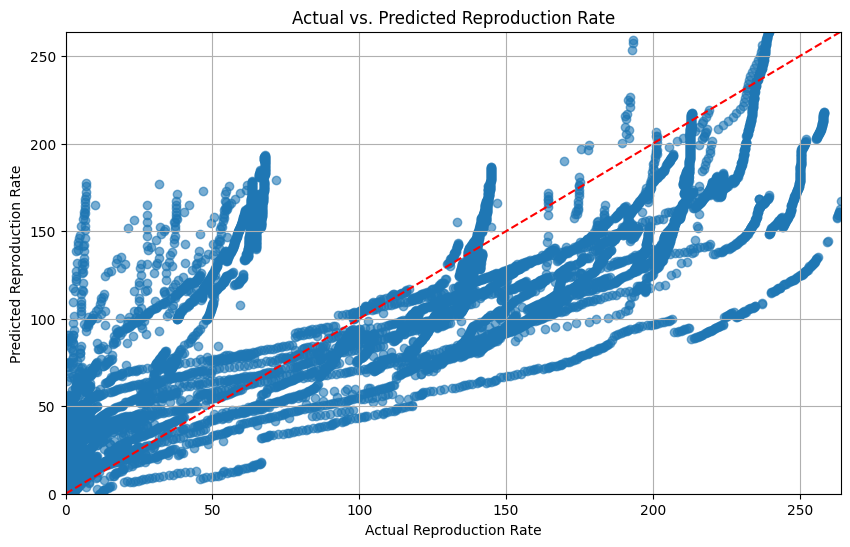

In [352]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.title('Actual vs. Predicted Reproduction Rate')
plt.xlabel('Actual Reproduction Rate')
plt.ylabel('Predicted Reproduction Rate')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()

## 5.2: Residuals Plot

A residuals plot shows the residuals (the difference between actual and predicted values) on the y-axis against the predicted values on the x-axis. This can help identify any patterns in the errors.

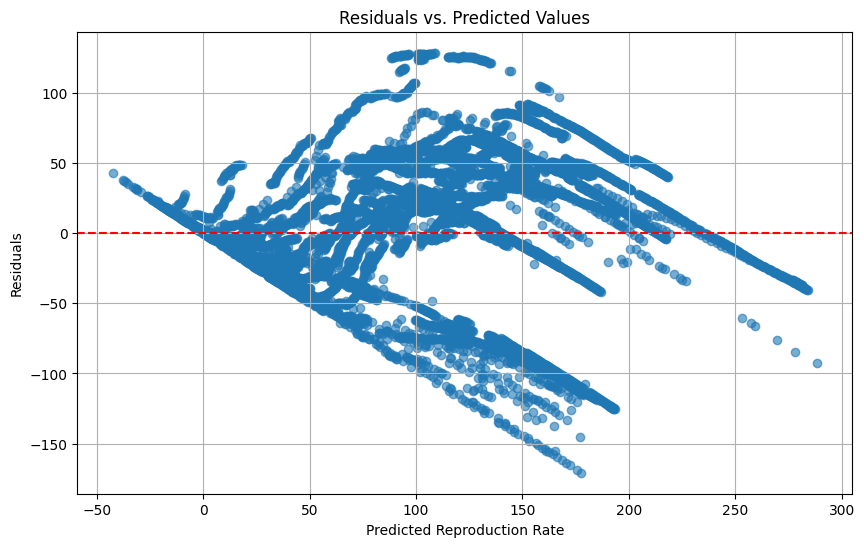

In [336]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Line at 0
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Reproduction Rate')
plt.ylabel('Residuals')
plt.grid()
plt.show()


In [145]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (16608,)
y_pred shape: (16608,)


## 5.3: Histogram of Residuals

A histogram of the residuals can show the distribution of errors, which should ideally be normally distributed around zero if the model is well-fitted.

When we say that the residuals should be normally distributed around zero, we mean that:
Most of the errors (residuals) should be small and close to zero.
Errors should have a symmetrical distribution, with equal occurrences of positive and negative errors.
What This Implies:

If the residuals are normally distributed around zero, it suggests that:
The model is well-fitted to the data.
There is no systematic bias in the predictions. For instance, if the model consistently overestimates or underestimates the true values, this would show up as a skewed distribution of residuals, rather than a symmetric one around zero.

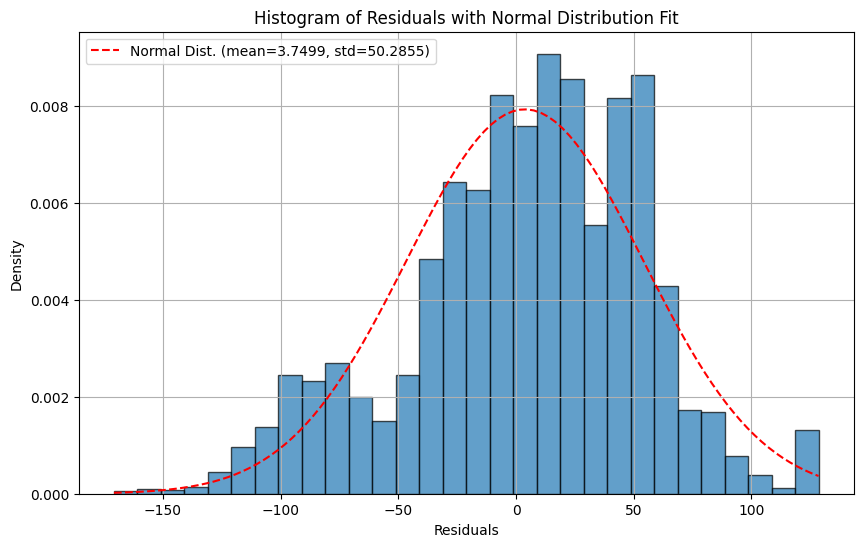

In [337]:

# Assuming you have already calculated residuals

# Calculate the mean and standard deviation of residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Generate values for the normal distribution curve
x = np.linspace(min(residuals), max(residuals), 100)  # 100 values between the min and max of residuals
normal_dist = stats.norm.pdf(x, mean_residuals, std_residuals)  # Probability density function of the normal distribution

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, density=True, edgecolor='black', alpha=0.7)  # Use density=True to normalize the histogram
plt.title('Histogram of Residuals with Normal Distribution Fit')
plt.xlabel('Residuals')
plt.ylabel('Density')  # Changing to density instead of frequency

# Plot the normal distribution curve
plt.plot(x, normal_dist, 'r--', label=f'Normal Dist. (mean={mean_residuals:.4f}, std={std_residuals:.4f})')

# Add grid and legend
plt.grid(True)
plt.legend()
plt.show()


# 6: Evaluating the model performance



## 6.1: Feature importance with regularization 

In [338]:
coefficients = pd.DataFrame(linear_model.coef_, X_train.columns, columns=['Coefficient'])
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients)

                         Coefficient  Absolute Coefficient
Gov Resp Index            -51.984172             51.984172
CH Index                   48.893520             48.893520
Econ Sup Index              6.658348              6.658348
Stringency Index           -2.375568              2.375568
days_since                  0.281896              0.281896
total_cases_per_million     0.000142              0.000142


In [339]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

lasso_coefficients = pd.DataFrame(lasso_model.coef_, X_train.columns, columns=['Coefficient'])
lasso_coefficients['Absolute Coefficient'] = lasso_coefficients['Coefficient'].abs()
lasso_coefficients = lasso_coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(lasso_coefficients)


                         Coefficient  Absolute Coefficient
CH Index                    3.316221              3.316221
Stringency Index           -2.368523              2.368523
days_since                  0.281877              0.281877
Econ Sup Index              0.148410              0.148410
Gov Resp Index              0.093494              0.093494
total_cases_per_million     0.000142              0.000142
